In [1]:
# SB柳田の通算成績を可視化
# 利用パッケージ
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
# データ取得
url = 'https://npb.jp/bis/players/31835133.html'
df = pd.read_html(url)

# テーブル数を確認
print(len(df))

2


pd.read_html()は、そのページ内のすべてのtableタグをDataFrame化するので、テーブル数を確認する必要がある

In [9]:
df[0]

,0,1
0,ポジション,外野手
1,投打,右投左打
2,身長／体重,188cm／93kg
3,生年月日,1988年10月9日
4,経歴,広島商 - 広島経済大
5,ドラフト,2010年ドラフト2位


In [4]:
df[1]

,年度,所属球団,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,...,盗塁刺,犠打,犠飛,四球,死球,三振,併殺打,打率,長打率,出塁率
0,2011.0,福岡ソフトバンク,6,5,5,1,0,0,0,0,...,0,0,0,0,0,3,0,0.000,0.000,0.000
1,2012.0,福岡ソフトバンク,68,212,195,17,48,10,1,5,...,1,2,0,10,5,56,2,0.246,0.385,0.300
2,2013.0,福岡ソフトバンク,104,337,298,48,88,19,2,11,...,1,0,0,32,7,96,3,0.295,0.483,0.377
3,2014.0,福岡ソフトバンク,144,615,524,91,166,18,4,15,...,6,0,3,72,16,131,8,0.317,0.452,0.413
4,2015.0,福岡ソフトバンク,138,605,502,110,182,31,1,34,...,8,0,1,88,14,101,9,0.363,0.631,0.469
5,2016.0,福岡ソフトバンク,120,536,428,82,131,31,4,18,...,2,0,0,100,8,97,8,0.306,0.523,0.446
6,2017.0,福岡ソフトバンク,130,551,448,95,139,30,1,31,...,7,0,7,89,7,123,6,0.310,0.589,0.426
7,2018.0,福岡ソフトバンク,130,550,475,95,167,29,5,36,...,7,0,5,62,8,105,8,0.352,0.661,0.431
8,2019.0,福岡ソフトバンク,38,157,128,17,37,6,1,7,...,1,0,0,28,1,28,4,0.289,0.516,0.420
9,2020.0,福岡ソフトバンク,119,515,427,90,146,23,5,29,...,2,0,3,84,1,103,2,0.342,0.623,0.449


所属球団の列と、初年度および通算成績の行を削除

変数名を取得

In [9]:
df[1].columns

Index(['年度', '所属球団', '試合', '打席', '打数', '得点', '安打', '二塁打', '三塁打', '本塁打', '塁打',
       '打点', '盗塁', '盗塁刺', '犠打', '犠飛', '四球', '死球', '三振', '併殺打', '打率', '長打率',
       '出塁率'],
      dtype='object')

In [6]:
stats = df[1]
stats = stats.drop(columns='所属球団')
stats = stats.drop(stats.index[[0, -1]])
stats

,年度,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,...,盗塁刺,犠打,犠飛,四球,死球,三振,併殺打,打率,長打率,出塁率
1,2012.0,68,212,195,17,48,10,1,5,75,...,1,2,0,10,5,56,2,0.246,0.385,0.300
2,2013.0,104,337,298,48,88,19,2,11,144,...,1,0,0,32,7,96,3,0.295,0.483,0.377
3,2014.0,144,615,524,91,166,18,4,15,237,...,6,0,3,72,16,131,8,0.317,0.452,0.413
4,2015.0,138,605,502,110,182,31,1,34,317,...,8,0,1,88,14,101,9,0.363,0.631,0.469
5,2016.0,120,536,428,82,131,31,4,18,224,...,2,0,0,100,8,97,8,0.306,0.523,0.446
6,2017.0,130,551,448,95,139,30,1,31,264,...,7,0,7,89,7,123,6,0.310,0.589,0.426
7,2018.0,130,550,475,95,167,29,5,36,314,...,7,0,5,62,8,105,8,0.352,0.661,0.431
8,2019.0,38,157,128,17,37,6,1,7,66,...,1,0,0,28,1,28,4,0.289,0.516,0.420
9,2020.0,119,515,427,90,146,23,5,29,266,...,2,0,3,84,1,103,2,0.342,0.623,0.449
10,2021.0,141,593,516,95,155,36,2,28,279,...,0,0,2,69,6,122,6,0.300,0.541,0.388


新しくOPS列を作成

In [8]:
stats['OPS'] = stats['出塁率'] + stats['長打率']
stats

,年度,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,...,犠打,犠飛,四球,死球,三振,併殺打,打率,長打率,出塁率,OPS
1,2012.0,68,212,195,17,48,10,1,5,75,...,2,0,10,5,56,2,0.246,0.385,0.300,0.685
2,2013.0,104,337,298,48,88,19,2,11,144,...,0,0,32,7,96,3,0.295,0.483,0.377,0.860
3,2014.0,144,615,524,91,166,18,4,15,237,...,0,3,72,16,131,8,0.317,0.452,0.413,0.865
4,2015.0,138,605,502,110,182,31,1,34,317,...,0,1,88,14,101,9,0.363,0.631,0.469,1.100
5,2016.0,120,536,428,82,131,31,4,18,224,...,0,0,100,8,97,8,0.306,0.523,0.446,0.969
6,2017.0,130,551,448,95,139,30,1,31,264,...,0,7,89,7,123,6,0.310,0.589,0.426,1.015
7,2018.0,130,550,475,95,167,29,5,36,314,...,0,5,62,8,105,8,0.352,0.661,0.431,1.092
8,2019.0,38,157,128,17,37,6,1,7,66,...,0,0,28,1,28,4,0.289,0.516,0.420,0.936
9,2020.0,119,515,427,90,146,23,5,29,266,...,0,3,84,1,103,2,0.342,0.623,0.449,1.072
10,2021.0,141,593,516,95,155,36,2,28,279,...,0,2,69,6,122,6,0.300,0.541,0.388,0.929


OPSの推移を可視化

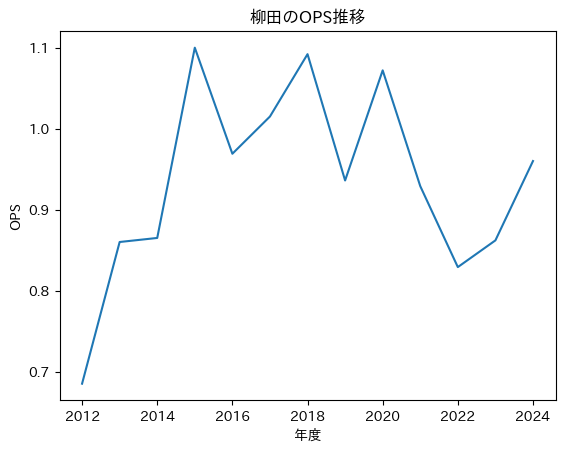

In [10]:
plt.plot(stats['年度'], stats['OPS'])
plt.xlabel('年度')
plt.ylabel('OPS')
plt.title('柳田のOPS推移')
plt.show()

出塁率と長打率の関連性

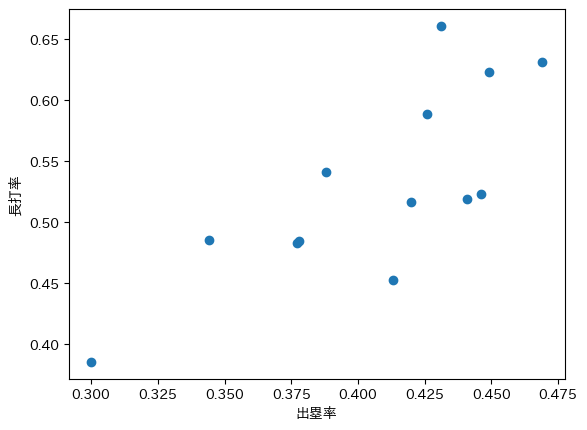

In [11]:
plt.scatter(stats['出塁率'], stats['長打率'])
plt.xlabel('出塁率')
plt.ylabel('長打率')
plt.show()